In [1]:
import pandas as pd



In [2]:
df=pd.read_csv('EnglishPoliticalTweets.csv')

In [3]:
df

,OriginalTweet,Sentiment
0,"No action seen , over a month now. Shows serio...",Negative
1,"Imran Khan could have influenced the police, t...",Negative
2,Today all govt. servants were relaxed. There w...,Negative
3,Insha Allah these headlines will soon make us ...,Negative
4,"The bottom line today is In 4.5 yrs, certified...",Negative
...,...,...
15698,PTI supporting Chaudhry Pervaiz Elahi for the ...,POSITIVE
15699,Another sixer by #ImranKhan. PML-Q will suppor...,POSITIVE
15700,PEMRA has taken action against the media chann...,POSITIVE
15701,After my complaint to PEMRA through @AzharSidd...,POSITIVE


In [4]:
df.shape

(15703, 2)

In [5]:
df.head()

,OriginalTweet,Sentiment
0,"No action seen , over a month now. Shows serio...",Negative
1,"Imran Khan could have influenced the police, t...",Negative
2,Today all govt. servants were relaxed. There w...,Negative
3,Insha Allah these headlines will soon make us ...,Negative
4,"The bottom line today is In 4.5 yrs, certified...",Negative


In [6]:
df

,OriginalTweet,Sentiment
0,"No action seen , over a month now. Shows serio...",Negative
1,"Imran Khan could have influenced the police, t...",Negative
2,Today all govt. servants were relaxed. There w...,Negative
3,Insha Allah these headlines will soon make us ...,Negative
4,"The bottom line today is In 4.5 yrs, certified...",Negative
...,...,...
15698,PTI supporting Chaudhry Pervaiz Elahi for the ...,POSITIVE
15699,Another sixer by #ImranKhan. PML-Q will suppor...,POSITIVE
15700,PEMRA has taken action against the media chann...,POSITIVE
15701,After my complaint to PEMRA through @AzharSidd...,POSITIVE


In [7]:
# Drop rows where 'Sentiment' is NaN
df = df.dropna(subset=['Sentiment'])


In [8]:
df = df.dropna(subset=['OriginalTweet'])

In [9]:
# Check for null values in specific columns
null_counts = df[['OriginalTweet', 'Sentiment']].isnull().sum()
print(null_counts)


OriginalTweet    0
Sentiment        0
dtype: int64


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

## Now we will import style and rcParams from matplotlib to modify the style of graphs. And, we will import warnings library, to ignore the unnecessary warnings which are displayed

In [11]:
from matplotlib import style,rcParams


In [12]:
!pip install seaborn

In [13]:
import seaborn as sns
sns.set_style("white")
rcParams['figure.figsize'] = (10, 5)

import warnings
warnings.filterwarnings('ignore')

#### Natural Language Processing
1. nltk - Natural Language Toolkit is a collection of libraries for natural language processing
2. stopwords - collection of words that don't provide any meaning to a sentence
3. WordNetLemmatizer - used to convert different forms of words into a single item but still keeping the context intact

In [14]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

## Scikit-Learn (Machine Learning Library for Python)
CountVectorizer - transform text to vectors
train_test_split - splits data into train and test data
GridSearchCV - for hyperparameter tuning
RandomForestClassifier - machine learning algorithm for classification

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV

In [16]:
pip install scikit-plot


Note: you may need to restart the kernel to use updated packages.


In [17]:
!pip install --upgrade scikit-plot



#### Evaluation Metrics
1. Accuracy Score - no. of correctly classified instances/total no. of istances
2. Precision Score
3. Recall Score
4. Roc Curve
5. Classification Report
6. Confusion Matrix

In [18]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report


In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
pip install contractions


Note: you may need to restart the kernel to use updated packages.


In [21]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import contractions

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

lm = WordNetLemmatizer()

def expand_contractions(text):
    """Expands contractions like don't -> do not"""
    return contractions.fix(text)

def remove_urls(text):
    """Removes URLs from the text"""
    return re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

def remove_mentions_and_hashtags(text):
    """Removes Twitter mentions (@username) and hashtags (#hashtag)"""
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    return text

def remove_html(text):
    """Removes HTML tags from the text (if any)"""
    return BeautifulSoup(text, "lxml").get_text()

def remove_special_characters(text):
    """Removes special characters and numbers"""
    return re.sub(r'[^a-zA-Z\s]', '', text)

def remove_repeated_characters(text):
    """Reduces repeated characters to a single instance (e.g., 'soooo' -> 'so')"""
    return re.sub(r'(.)\1+', r'\1\1', text)

def text_transformation(df_col):
    """Applies a series of preprocessing steps to the text column"""
    corpus = []
    for item in df_col:
        new_item = str(item)  # Ensure the item is string

        # Apply preprocessing steps
        new_item = expand_contractions(new_item)  # Expand contractions
        new_item = remove_urls(new_item)  # Remove URLs
        new_item = remove_mentions_and_hashtags(new_item)  # Remove mentions and hashtags
        new_item = remove_html(new_item)  # Remove HTML tags
        new_item = remove_special_characters(new_item)  # Remove special characters and numbers
        new_item = remove_repeated_characters(new_item)  # Handle repeated characters

        # Convert to lowercase and split into words
        new_item = new_item.lower().split()

        # Lemmatize words and remove stopwords
        new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]

        # Join back the words into a single string
        corpus.append(' '.join(new_item))

    return corpus


[nltk_data] Downloading package stopwords to C:\Users\swiss
[nltk_data]     computer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\swiss
[nltk_data]     computer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\swiss
[nltk_data]     computer\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [22]:
corpus = text_transformation(df['OriginalTweet'])

In [23]:
corpus

['action seen month show seriousness going electricity defaulter thief govt',
 'imran khan could influenced police boy could isi drugged memory erasing meth',
 'today govt servant relaxed pressure according pmln establishment busy london',
 'insha allah headline soon make u proud pakistani ex pakistani pm nawaz sharif jailed corruption',
 'bottom line today yr certified liarcorrupt disqualified wannabe dictator nawaz sharif single handedly managed offend insult supreme court pakistan army liberal lawyer minority maulvis',
 'th major electricity breakdown khi water sindh govt announced free wifi service soon khi citizen wow',
 'taking account history party youturns pti back today announcement dissolving assembly within week',
 'bilawal zardari care tell dangerous duffer referring yesterday speech',
 'achievement imported govt change nab law hundred billion rupee corruption case closed',
 'served ptis purpose well wanted publicity',
 'want imran khan build house ghareeb ghurba encroacher

In [24]:
df["Sentiment"].count

<bound method Series.count of 0        Negative
1        Negative
2        Negative
3        Negative
4        Negative
           ...   
15698    POSITIVE
15699    POSITIVE
15700    POSITIVE
15701    POSITIVE
15702    POSITIVE
Name: Sentiment, Length: 15700, dtype: object>

In [25]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit the label encoder to the Sentiment column
y_encoded = label_encoder.fit_transform(df['Sentiment'])

# Now y_encoded contains the integer labels corresponding to your sentiments


In [26]:
print(df['Sentiment'].unique())

['Negative' 'Neutral' 'Positive' 'NEGATIVE' 'SUGGESTION' 'NEUTRAL'
 'POSITIVE']


In [27]:
print("Unique labels in encoded data:", label_encoder.classes_)


Unique labels in encoded data: ['NEGATIVE' 'NEUTRAL' 'Negative' 'Neutral' 'POSITIVE' 'Positive'
 'SUGGESTION']


In [28]:
df

,OriginalTweet,Sentiment
0,"No action seen , over a month now. Shows serio...",Negative
1,"Imran Khan could have influenced the police, t...",Negative
2,Today all govt. servants were relaxed. There w...,Negative
3,Insha Allah these headlines will soon make us ...,Negative
4,"The bottom line today is In 4.5 yrs, certified...",Negative
...,...,...
15698,PTI supporting Chaudhry Pervaiz Elahi for the ...,POSITIVE
15699,Another sixer by #ImranKhan. PML-Q will suppor...,POSITIVE
15700,PEMRA has taken action against the media chann...,POSITIVE
15701,After my complaint to PEMRA through @AzharSidd...,POSITIVE


In [29]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming `corpus` contains your cleaned tweet data and `df['Sentiment']` contains the labels
# Step 1: Encode the Sentiment labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(df['Sentiment'])

# Step 2: Create a new DataFrame for the cleaned data and labels
data = pd.DataFrame({
    'CleanedTweet': corpus,  # Your cleaned tweets
    'Sentiment': encoded_labels  # Encoded labels
})

# Display the first few rows of the new DataFrame
print(data.head())


                                        CleanedTweet  Sentiment
0  action seen month show seriousness going elect...          2
1  imran khan could influenced police boy could i...          2
2  today govt servant relaxed pressure according ...          2
3  insha allah headline soon make u proud pakista...          2
4  bottom line today yr certified liarcorrupt dis...          2


In [30]:
data

,CleanedTweet,Sentiment
0,action seen month show seriousness going elect...,2
1,imran khan could influenced police boy could i...,2
2,today govt servant relaxed pressure according ...,2
3,insha allah headline soon make u proud pakista...,2
4,bottom line today yr certified liarcorrupt dis...,2
...,...,...
15695,pti supporting chaudhry pervaiz elahi chief mi...,4
15696,another sixer pmlq support pti chaudhry pervai...,4
15697,pemra taken action medium channel aired false ...,4
15698,complaint pemra pemra ordered apologise false ...,4


In [31]:
# Display the mapping of labels to categories
label_mapping = {index: label for index, label in enumerate(label_encoder.classes_)}
print(label_mapping)


{0: 'NEGATIVE', 1: 'NEUTRAL', 2: 'Negative', 3: 'Neutral', 4: 'POSITIVE', 5: 'Positive', 6: 'SUGGESTION'}


In [32]:
data.shape

(15700, 2)

In [33]:
# Check for null values in specific columns
null_counts = data[['CleanedTweet', 'Sentiment']].isnull().sum()
print(null_counts)


CleanedTweet    0
Sentiment       0
dtype: int64


In [34]:
data

,CleanedTweet,Sentiment
0,action seen month show seriousness going elect...,2
1,imran khan could influenced police boy could i...,2
2,today govt servant relaxed pressure according ...,2
3,insha allah headline soon make u proud pakista...,2
4,bottom line today yr certified liarcorrupt dis...,2
...,...,...
15695,pti supporting chaudhry pervaiz elahi chief mi...,4
15696,another sixer pmlq support pti chaudhry pervai...,4
15697,pemra taken action medium channel aired false ...,4
15698,complaint pemra pemra ordered apologise false ...,4


## training simple neural network

In [35]:
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense


In [36]:
# Building the model
#model = Sequential()

# Input layer
#model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))  # X_train.shape[1] is the number of features

# Hidden layer
#model.add(Dense(64, activation='relu'))

# Output layer
#model.add(Dense(7, activation='softmax'))  # 7 classes for the output




In [37]:
#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [38]:
# Fit the model
#history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.1)


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer  # Using TF-IDF
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Limit features for performance

# Fit and transform the CleanedTweet column to create features
X = vectorizer.fit_transform(data['CleanedTweet'])

# Assign labels
y = data['Sentiment']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the train and test sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Building the model
model = Sequential()

# Input layer with Batch Normalization
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.3))  # Dropout layer for regularization

# Hidden layer
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))  # Dropout layer for regularization
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(7, activation='softmax'))  # Adjust number of classes

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
#early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Fit the model with increased epochs and validation split
history = model.fit(X_train, y_train, epochs=35, batch_size=16, 
                    validation_split=0.1)# callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")


X_train shape: (12560, 5000)
X_test shape: (3140, 5000)
y_train shape: (12560,)
y_test shape: (3140,)
Epoch 1/35
707/707 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.3090 - loss: 1.4732 - val_accuracy: 0.4355 - val_loss: 1.1913
Epoch 2/35
707/707 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4596 - loss: 1.1681 - val_accuracy: 0.4873 - val_loss: 1.0967
Epoch 3/35
707/707 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.6071 - loss: 0.9344 - val_accuracy: 0.4960 - val_loss: 1.0919
Epoch 4/35
707/707 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.6870 - loss: 0.7891 - val_accuracy: 0.5024 - val_loss: 1.2101
Epoch 5/35
707/707 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7479 - loss: 0.6641 - val_accuracy: 0.4825 - val_loss: 1.3416
Epoch 6/35
707/707 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7878 - loss: 0.5732 - val_accuracy: 0.4817 - val_loss: 1.4216
Epoch 7/35
707/707 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8206 - loss: 0.4934 - val_accuracy: 0.4817 - val_loss: 1

In [40]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.optimizers import Adam  # Importing Adam optimizer

# # Initialize TF-IDF Vectorizer
# vectorizer = TfidfVectorizer(max_features=5000)

# # Fit and transform the CleanedTweet column to create features
# X = vectorizer.fit_transform(data['CleanedTweet'])

# # Assign labels
# y = data['Sentiment']

# # Split the data into training and testing sets (80% train, 20% test)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Print the shapes of the train and test sets
# print(f"X_train shape: {X_train.shape}")
# print(f"X_test shape: {X_test.shape}")
# print(f"y_train shape: {y_train.shape}")
# print(f"y_test shape: {y_test.shape}")

# # Building the model
# model = Sequential()

# # Input layer with Batch Normalization
# model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))  # Dropout layer for regularization

# # Hidden layer
# model.add(Dense(64, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))  # Dropout layer for regularization

# model.add(Dense(128, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

# model.add(Dense(64, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

# # Output layer
# model.add(Dense(7, activation='softmax'))  # Adjust number of classes

# # Set the learning rate
# learning_rate = 0.001  # You can adjust this value

# # Create the Adam optimizer with the specified learning rate
# optimizer = Adam(learning_rate=learning_rate)

# # Compile the model with the optimizer
# model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Early stopping to prevent overfitting
# #early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# # Fit the model with increased epochs and validation split
# history = model.fit(X_train, y_train, epochs=20, batch_size=16, 
#                     validation_split=0.1) # callbacks=[early_stopping])

# # Evaluate the model on the test set
# test_loss, test_accuracy = model.evaluate(X_test, y_test)
# print(f"Test accuracy: {test_accuracy:.4f}")


X_train shape: (12560, 5000)
X_test shape: (3140, 5000)
y_train shape: (12560,)
y_test shape: (3140,)
Epoch 1/20
707/707 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.2270 - loss: 2.3912 - val_accuracy: 0.3225 - val_loss: 1.3395
Epoch 2/20
707/707 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.3207 - loss: 1.4455 - val_accuracy: 0.3893 - val_loss: 1.2480
Epoch 3/20
707/707 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.3474 - loss: 1.3171 - val_accuracy: 0.4172 - val_loss: 1.1865
Epoch 4/20
707/707 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.3938 - loss: 1.2365 - val_accuracy: 0.4427 - val_loss: 1.1526
Epoch 5/20
707/707 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4501 - loss: 1.1703 - val_accuracy: 0.4801 - val_loss: 1.1099
Epoch 6/20
707/707 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5414 - loss: 1.0567 - val_accuracy: 0.4960 - val_loss: 1.0861
Epoch 7/20
707/707 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6087 - loss: 0.9655 - val_accuracy: 0.4992 - val_loss: 1

In [41]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions on the test set
y_pred_probs = model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred_probs, axis=1)  # Get the predicted class with the highest probability

# If you want to see the predicted classes
print("Predicted classes:", y_pred_classes)

# Now, you can also evaluate the model using a confusion matrix and classification report
# Assuming y_test is the true labels for the test set
conf_matrix = confusion_matrix(y_test, y_pred_classes)
class_report = classification_report(y_test, y_pred_classes)

print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)


99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Predicted classes: [2 3 0 ... 3 3 2]
Confusion Matrix:
[[ 72  12   8   2   0   2   0]
 [ 19  39  10  22   0  11   0]
 [  4  12 413 315   0 186   0]
 [  2  12 305 578   0 257   0]
 [  1   7   0   5   0   1   0]
 [  6   9 151 282   0 385   0]
 [  3   5   1   2   0   1   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.75      0.71        96
           1       0.41      0.39      0.40       101
           2       0.47      0.44      0.45       930
           3       0.48      0.50      0.49      1154
           4       0.00      0.00      0.00        14
           5       0.46      0.46      0.46       833
           6       0.00      0.00      0.00        12

    accuracy                           0.47      3140
   macro avg       0.35      0.36      0.36      3140
weighted avg       0.47      0.47      0.47      3140



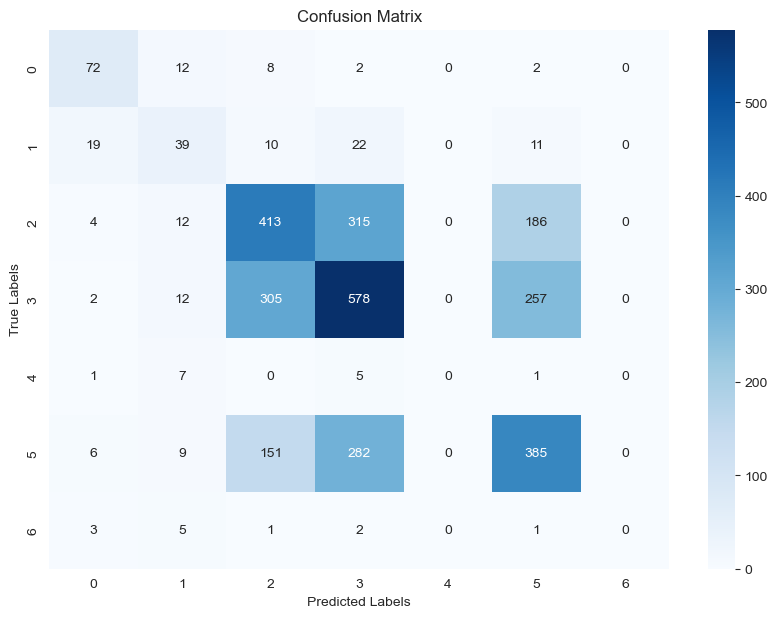

<Figure size 1200x600 with 0 Axes>

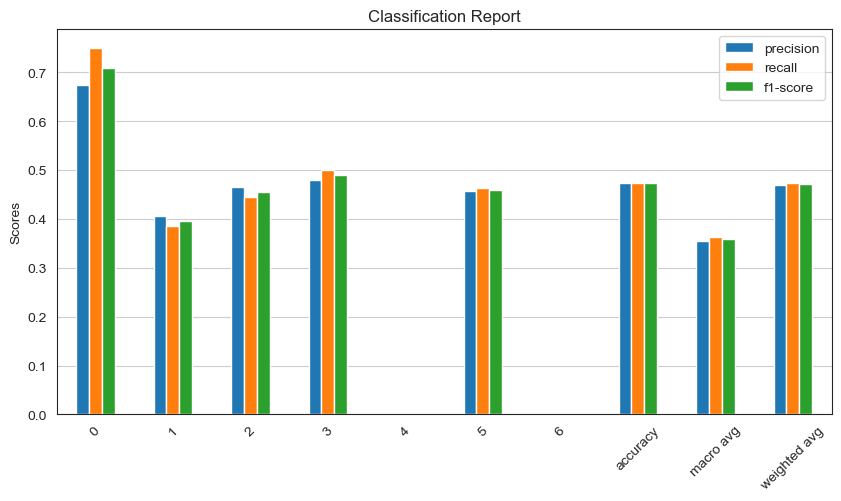

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(7), yticklabels=np.arange(7))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Extracting precision, recall, f1-score from the classification report
report = classification_report(y_test, y_pred_classes, output_dict=True)

# Convert the report into a DataFrame
report_df = pd.DataFrame(report).transpose()

# Plotting the classification report
plt.figure(figsize=(12, 6))
report_df.drop(['support'], axis=1).plot(kind='bar', rot=0)
plt.title('Classification Report')
plt.ylabel('Scores')
plt.xticks(range(len(report_df.index)), report_df.index, rotation=45)
plt.legend(loc='upper right')
plt.grid(axis='y')
plt.show()


## For custom Input prediction

In [43]:
import numpy as np

# Define a mapping from encoded labels back to original categories
label_mapping = {0: 'NEGATIVE', 1: 'NEUTRAL', 2: 'Negative', 3: 'Neutral', 4: 'POSITIVE', 5: 'Positive', 6: 'SUGGESTION'}

# Function to take custom input and predict
def predict_custom_input(text):
    # Preprocess the input text
    text_vectorized = vectorizer.transform([text])  # Vectorize the input
    
    # Predict the sentiment using the trained model
    prediction = model.predict(text_vectorized)
    
    # Get the index of the predicted category
    predicted_label_index = np.argmax(prediction)
    
    # Map the index to the corresponding sentiment category
    predicted_label = label_mapping[predicted_label_index]
    
    return predicted_label

# Example usage:
input_text = input("Enter your text for prediction: ")
predicted_sentiment = predict_custom_input(input_text)
print(f"The predicted sentiment is: {predicted_sentiment}")


Enter your text for prediction:  This chawwal thinks I showed porsche cars to corrupt government officals - this much have been right after I took the first luxury rocket with vvip cabin to the moon. 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
The predicted sentiment is: Negative
